In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

In [72]:
def display(eq:sp.Eq, size=20):
    """
    Use matplotlib to render LaTeX equations to figure within notebook.
    
    ----------
    eq : str or sympy.Eq
    LaTeX equation to render
    
    size : int
    size of the equation
    """
    
    if isinstance(eq, str):
        eq_latex = eq
    else:
        eq_latex = sp.latex(eq)

    fig,ax=plt.subplots()
    fig.set_size_inches(0.01, 0.01)
    ax.axis("off")
    plt.title(r'$' + eq_latex + r'$' , size=size);

# Is $Y$ normal?
In linear regression, notation such as the below equation can be somewhat puzzeling, if you are a beginner, like me:

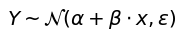

In [76]:
eq = r'Y \sim \mathcal{N}(\alpha+\beta \cdot x,\epsilon)'
display(eq)

What does this mean?

Does it mean that $ Y $ is now also normal distributed?

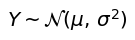

In [78]:
eq = r'Y \sim \mathcal{N}(\mu,\,\sigma^{2})\ '
display(eq)

This notebook explores this a bit, in order to get a more clear understanding.

Lets consider a simple linear line:

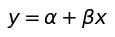

In [79]:
x,y,alpha,beta = sp.symbols('x y alpha beta')
eq = sp.Eq(y,
          alpha + beta*x)
display(eq)

In [80]:
## Converting sympy expression to python method:
lambda_eq = sp.lambdify([x,alpha,beta],eq.rhs)
lambda_eq

<function _lambdifygenerated(x, alpha, beta)>

Here is a graph showing this line for 5 values of $x$:

In [81]:
N_x = 5
N_epsilon = 1000
N = N_x*N_epsilon


xs = np.linspace(0,1, int(N_x))
x_ = np.tile(xs,N_epsilon)

df = pd.DataFrame(index=x_)
df['x'] = x_
df['alpha'] = 10
df['beta'] = 60
df['y'] = lambda_eq(x=df['x'], alpha=df['alpha'], beta=df['beta'])

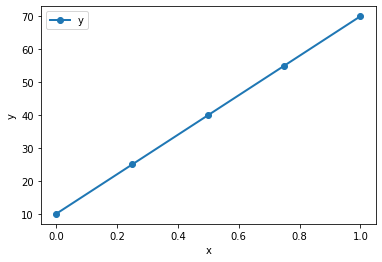

In [82]:
fig,ax=plt.subplots()
df.groupby(by='x').first().plot(y='y', style='o-', lw=2, ax=ax, zorder=2)
ax.set_ylabel('y')
ax.set_xlabel('x');

Let's pretend that this line represents something that we can measure from a physical experiment. We assume that the measuring error is normal distributed $ \epsilon \sim \mathcal{N}(0,\,\sigma^{2})\ $ so that the measured values of $y$ is expressed as:

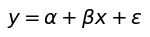

In [83]:
epsilon = sp.symbols('epsilon')
eq_probabalitic = sp.Eq(eq.lhs,
                       eq.rhs + epsilon)

display(eq_probabalitic)

We measure $y$ 1000 times for each of the 5 values of $x$. This means that we will get 1000 values of the measuring error $\epsilon \sim \mathcal{N}(0,2^{2})\ $ for each $x$.

In [84]:
np.random.seed(42)
df['epsilon'] = df.groupby('x')['y'].transform(lambda x: np.random.normal(loc=0, scale = 2.0, size=N_epsilon))

In [85]:
## Converting sympy expression to python method:
lambda_eq_probabalitic = sp.lambdify([x,alpha,beta,epsilon],eq_probabalitic.rhs)
lambda_eq_probabalitic

<function _lambdifygenerated(x, alpha, beta, epsilon)>

In [86]:
df['y_measure'] = lambda_eq_probabalitic(x=df['x'], alpha=df['alpha'], beta=df['beta'], epsilon=df['epsilon'])


The measured values of $y$ is shown in the graph below:

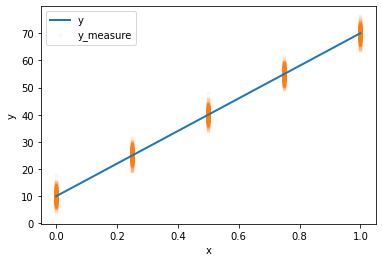

In [87]:
fig,ax=plt.subplots()
df.plot(y='y', style='-', lw=2, ax=ax, zorder=2)
df.plot(y='y_measure', style='.', alpha=0.05, ax=ax, zorder=1)
ax.set_ylabel('y')
ax.set_xlabel('x');

The measured $y$ has values distributed around the true values of $y$. These distributions becomes even more visible if we create histograms of the measured $y$:

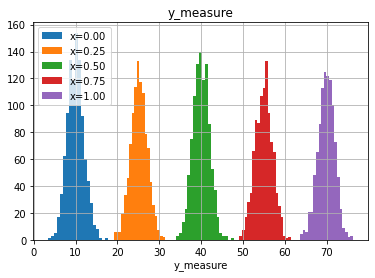

In [88]:
fig,ax=plt.subplots()
for the_x, group in df.groupby(by='x'):
    group.hist(column='y_measure', bins=20, ax=ax, label='x=%0.2f' % the_x)
    
ax.set_xlabel('y_measure')
ax.legend();

So it is very clear from the above graph that the measured $y$ is not normal distributed but the measurement error $\epsilon$ (being the deviation from the idealized line) is:

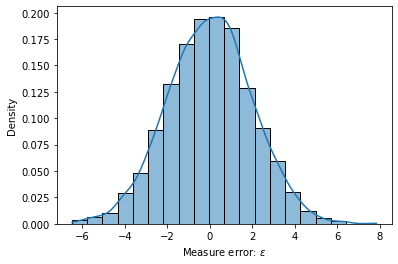

In [89]:
ax_epsilon = sns.histplot(data=df, x="epsilon", stat="density", bins=20, kde=True);
#ax_epsilon.set_xlim(ax_y.get_xlim());
ax_epsilon.set_xlabel('Measure error: $\epsilon$');

The histogram of the idealized $y$ looks like this, by the way:

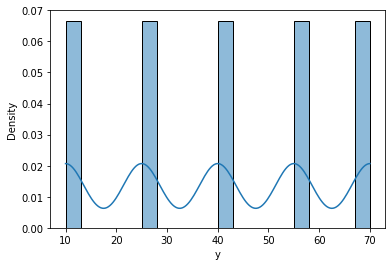

In [90]:
ax_y = sns.histplot(data=df, x="y", stat="density", bins=20, kde=True);